<a href="https://colab.research.google.com/github/vijayraju19-343/verzeo-project/blob/main/ML_MAJOR_JUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.shape

(768, 9)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().values.any()

False

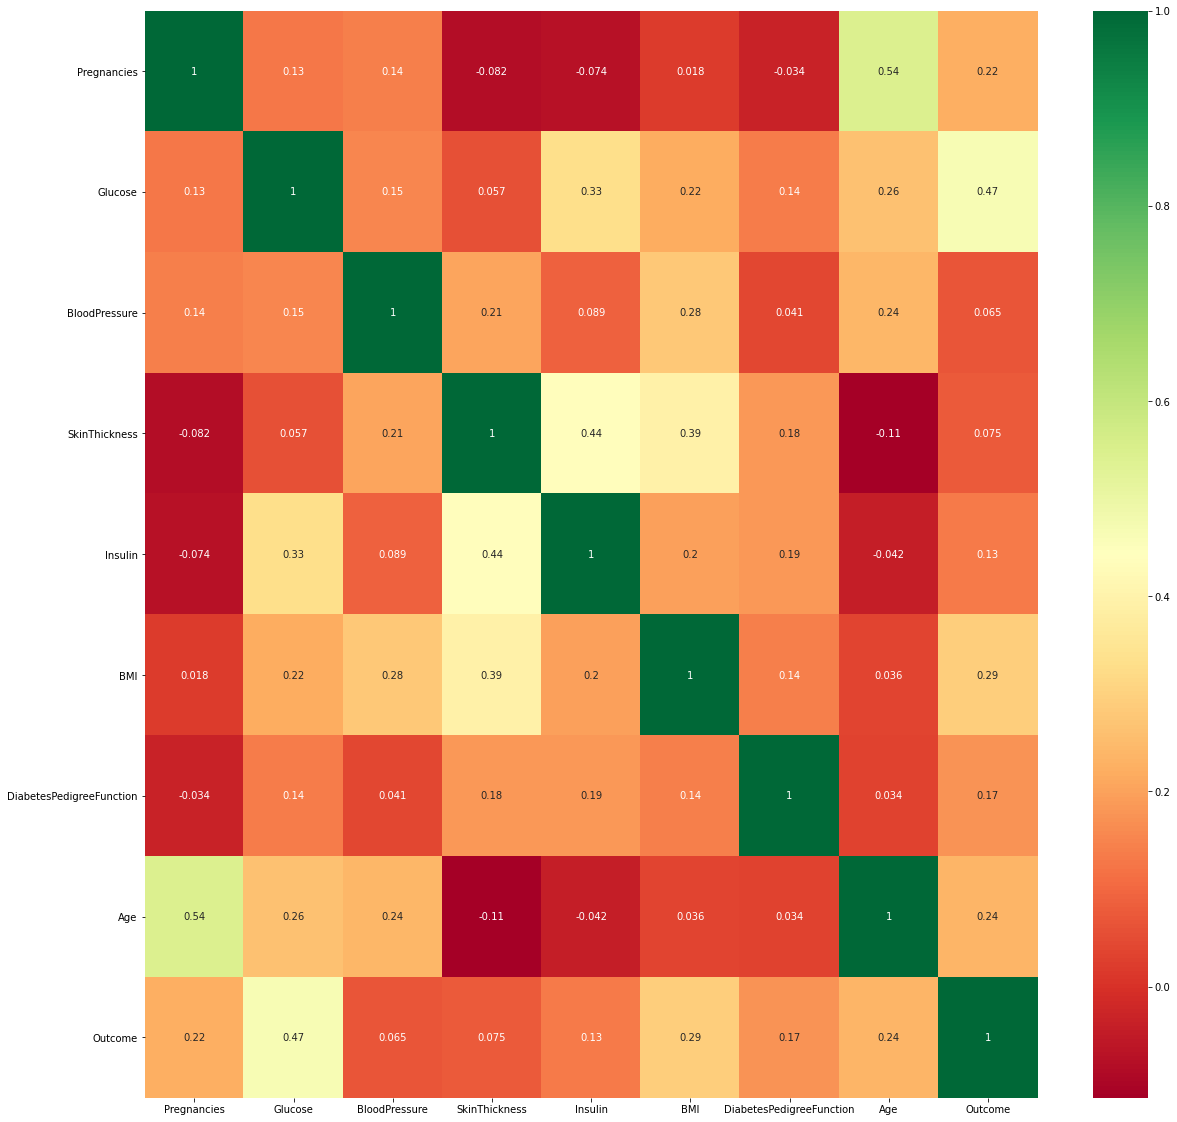

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diabetes_map = {True: 1, False: 0}

In [ ]:
data['Outcome'] = data['Outcome'].map(diabetes_map)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_flase_count = len(data.loc[data['Outcome'] == False])

In [ ]:
(diabetes_true_count,diabetes_flase_count)

(268, 500)

In [ ]:


from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [ ]:
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=10)

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.749


In [ ]:
## hyper parameter optimization

params={
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4 ],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7 ]
}

In [ ]:
## hyper parameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_second(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

In [ ]:
score

array([0.74074074, 0.77777778, 0.81481481, 0.77777778, 0.66666667,
       0.7037037 , 0.7962963 , 0.73584906, 0.73584906, 0.79245283])

In [ ]:
score.mean()

0.7541928721174004